In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
font = {'size': 14}
matplotlib.rc('font', **font)

In [4]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [5]:
from sympy import symbols, Matrix
from sympy.parsing.sympy_parser import parse_expr

In [8]:
vec2 = parse_expr('Matrix([1, 1])')
vec3 = parse_expr('Matrix([1, 1, 1])')
vec2, vec3

(Matrix([
 [1],
 [1]]), Matrix([
 [1],
 [1],
 [1]]))

In [29]:
V = np.array([vec2[0].evalf(), vec2[1].evalf()]).astype('float')
V

array([1., 1.])

In [28]:
U = np.array([vec3[0].evalf(), vec3[1].evalf(), vec3[2].evalf()]).astype('float')
U

array([1., 1., 1.])

In [179]:
V[0]

array([3.])

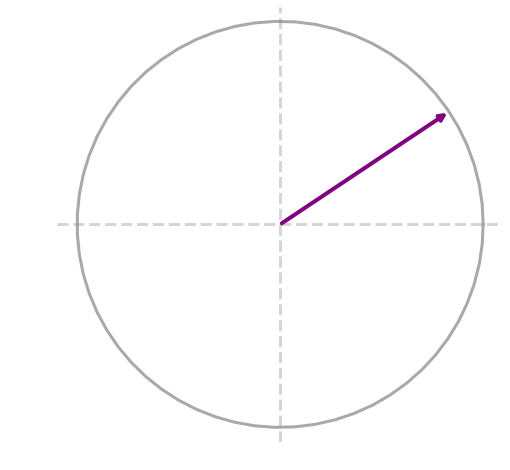

In [187]:
vec2 = parse_expr('Matrix([3,2])')
V = np.array(vec2).astype('float')
if V.shape == (2, 1): V = np.array([V])

plt.figure(figsize=(8,8))

plt.xlim([-2,2])
plt.ylim([-2,2])

plt.axis('equal')
X = [np.cos(x) for x in np.linspace(0, 2*np.pi, 64)]
Y = [np.sin(y) for y in np.linspace(0, 2*np.pi, 64)]

plot(X,Y, c='darkgray', lw=3)

for i in range(V.shape[0]):
    x = V[i][0]; y = V[i][1]
    magn = np.sqrt(x**2 + y**2)
    annotate("", xy=(x/magn, y/magn), xytext=(0, 0),arrowprops=dict(arrowstyle="->", color="purple", lw=4))


axhline(0, ls='dashed', alpha=0.33, c='gray', lw=3)
axvline(0, ls='dashed', alpha=0.33, c='gray', lw=3)
plt.axis('off')
fig.tight_layout()

In [163]:
vec3 = parse_expr('Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])')
U = np.array(vec3).astype('float')
U.shape

(3, 3)

In [169]:
U

array([1., 0., 0.])

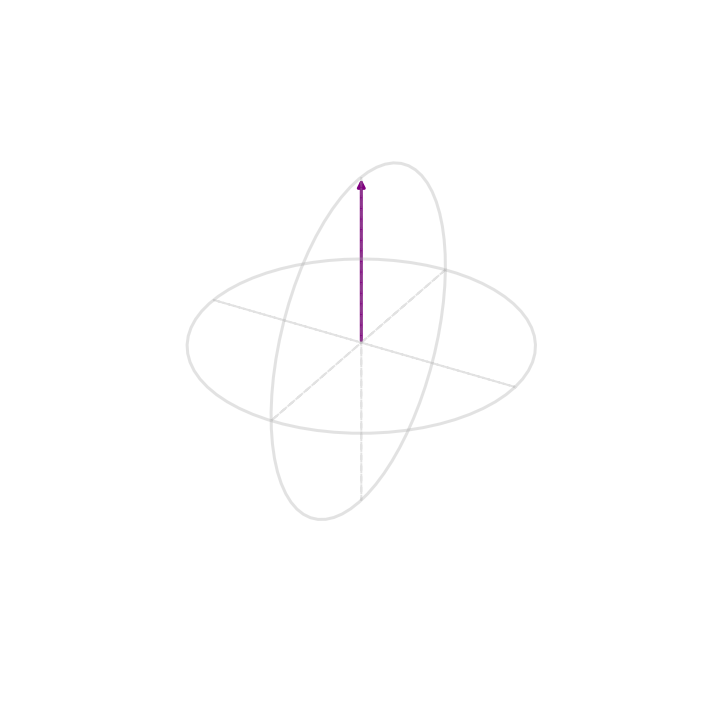

In [186]:
vec3 = parse_expr('Matrix([0, 0, 1])')
U = np.array(vec3).astype('float')
if U.shape == (3, 1): U = np.array([U])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.axis('equal')
X = np.array([np.cos(x) for x in np.linspace(0, 2*np.pi, 64)])
Y = np.array([np.sin(y) for y in np.linspace(0, 2*np.pi, 64)])
zeros = np.zeros(X.shape)

plot(X,zeros,zeros,c='darkgray', lw=2, alpha=0.33, ls='dashed')
plot(zeros,X,zeros,c='darkgray', lw=2, alpha=0.33, ls='dashed')

#annotate("", xy=(V[0]/magn, V[1]/magn), xytext=(0, 0),arrowprops=dict(arrowstyle="->", color="purple", lw=3))
plot(zeros,zeros,X,c='darkgray', lw=2, alpha=0.33, ls='dashed')

for i in range(U.shape[0]):
    x = U[i][0]; y = U[i][1]; z = U[i][2]
    magn = np.sqrt(x**2+y**2+z**2)
    ax.add_artist(Arrow3D([0, x], [0, y], [0,z], mutation_scale=15, lw=3, arrowstyle="-|>", color="purple"))
    #ax.add_artist(Arrow3D([0, 0], [0, -1], [0,1], mutation_scale=15, lw=3, arrowstyle="-|>", color="purple"))

plot(X,Y,zeros,c='darkgray', lw=3, alpha=0.33)
plot(zeros,X,Y,c='darkgray', lw=3, alpha=0.33)
plt.axis('off')
fig.tight_layout()